<a href="https://colab.research.google.com/github/Nicobpm/selled_games_around_the_world/blob/main/Proyect_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/Nicobpm/selled_games_around_the_world/main/games.csv")

In [24]:
df.info()
print()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Se realizaran la transformacion de los datos de mayusculas a minisculas

In [25]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Se realizara la validacion de los valores nulos y se remplazaran por "unknow" para poder analizar datos mas presisos y garantes asi mismo se realizara la validacion de los valores ausentes en las columnas de calificacion y se remplazar por "unknow" para poder generar los reportes numericos sin problemas.

adicional se puede evidenciar que hay juegos que no han sido valorados por los compradores

<!-- Al darnos cuenta en las validaciones de los valores ausentes podemos determinar que hay juegos que no han sido valorados aun por sus compradores -->

In [26]:
df["year_of_release"] = df["year_of_release"].fillna(0)
df["genre"] = df["genre"].fillna("unknow")
df["name"] = df["name"].fillna("unknow")
df["critic_score"] = df["critic_score"].fillna("NaN")
df["user_score"] = df["user_score"].replace("tbd", "NaN")
df["user_score"] = df["user_score"].fillna("NaN")
df["rating"] = df["rating"].fillna("unknow")
print(df.isna().sum())
print()
df.head()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow


Se realiza el cambio de typo de dato float a dato int (numero entero) en la columna "year_of_release"

In [27]:
df["year_of_release"] = df["year_of_release"].astype("int")
df["critic_score"] = df["critic_score"].replace("unknow", "nan").astype(float)
df["user_score"] = df["user_score"].replace("unknow", "nan").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Chequeo de duplicados

In [28]:
print(f'El total de filas duplicadas es de {df.duplicated().sum()}')

El total de filas duplicadas es de 0


In [29]:
na = df["na_sales"]
eu = df["eu_sales"]
jp = df["jp_sales"]

df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]
print("Se realiza la creacion de una columna nueva llamada 'total_sales' la cual contiene la suma de las ventas de las tres columnas de ventas")

df.head()

Se realiza la creacion de una columna nueva llamada 'total_sales' la cual contiene la suma de las ventas de las tres columnas de ventas


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow,31.38


como podemos observar, nos encontramos con una grafica que nos muestra claramente que en los años 2007 al 2011 han sido los mas productivos, y han venido una tendencia a la baja con la generacion de nuevos videojuegos esto se puede deber a menos inversion en la misma


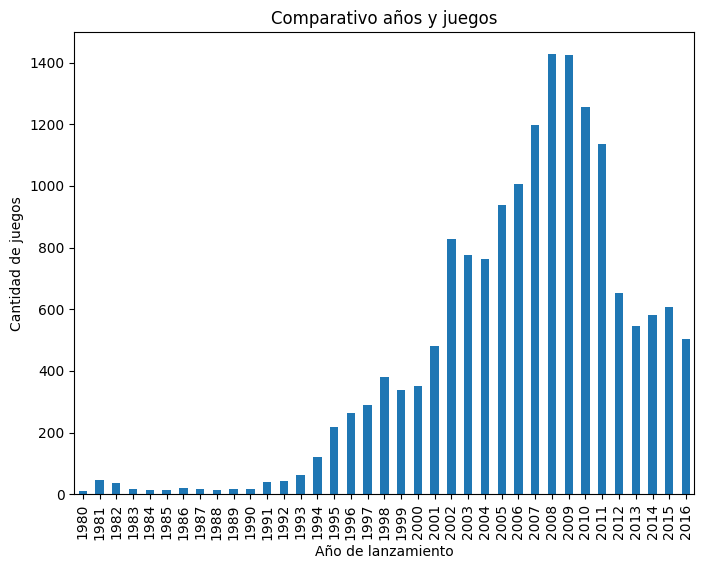

In [30]:

print("como podemos observar, nos encontramos con una grafica que nos muestra claramente que en los años 2007 al 2011 han sido los mas productivos, y han venido una tendencia a la baja con la generacion de nuevos videojuegos esto se puede deber a menos inversion en la misma")

Comparativa_de_plataformas = df.groupby(by=["year_of_release"])[
    "name"].count().reset_index().query("year_of_release > 0")
Comparativa_de_plataformas.plot(kind = "bar",
                                  x = "year_of_release",
                                  y = "name",
                                  title = "Comparativo años y juegos",
                                  ylabel = "Cantidad de juegos",
                                  xlabel = "Año de lanzamiento",
                                  legend = False,
                                  figsize = [8, 6],
                                  )

plt.show()

Como podemos observar existen 6 plataformas que han generado mas ventas de juegos hasta la fecha de generacion de la base de datos


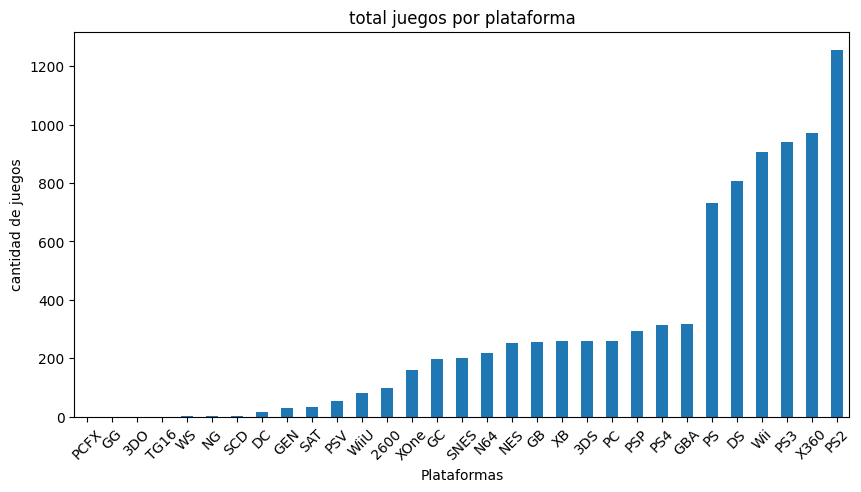

In [31]:
print("Como podemos observar existen 6 plataformas que han generado mas ventas de juegos hasta la fecha de generacion de la base de datos")

ventas_por_plataforma = df.groupby("platform")["total_sales"].sum().sort_values()

ventas_por_plataforma.plot(title = "total juegos por plataforma",
                          kind = "bar",
                          x = "platform",
                          y = "name",
                          xlabel = "Plataformas",
                          ylabel = "cantidad de juegos",
                          figsize=[10, 5],
                          rot=45,
                          )
plt.show()

En este apartado mostramos la distribucion entre las cantidad de ventas totales y su frecuencia  de las mismas
validamos la cantidad de ventas por plataforma


<function matplotlib.pyplot.show(close=None, block=None)>

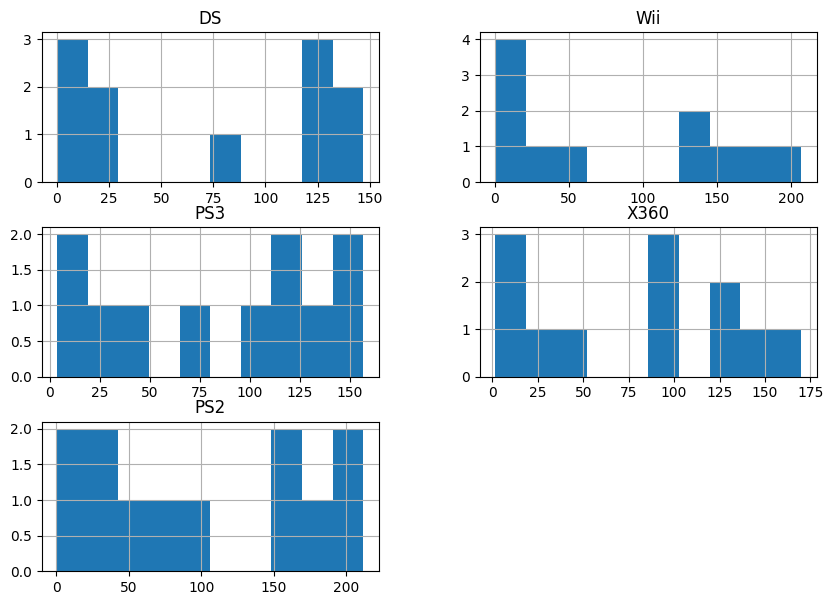

In [32]:
filtro_por_platafoma = df.pivot_table(
    index= "year_of_release",
    columns= "platform",
    values="total_sales",
    aggfunc="sum").query("year_of_release > 0")

print("En este apartado mostramos la distribucion entre las cantidad de ventas totales y su frecuencia  de las mismas")

ventas_por_plataforma_5= filtro_por_platafoma.loc[:,
                                                ["DS",
                                                "Wii",
                                                "PS3",
                                                "X360",
                                                "PS2"]]
print("validamos la cantidad de ventas por plataforma")
ventas_por_plataforma_5.hist(figsize=[10,7])
plt.show

vamos a evidenciar la linea de vida de cada plataforma al pasar de los años

Como podemos observar evidenciamos que apartir del año 2000 vemos un auge en la creacion de juegos 


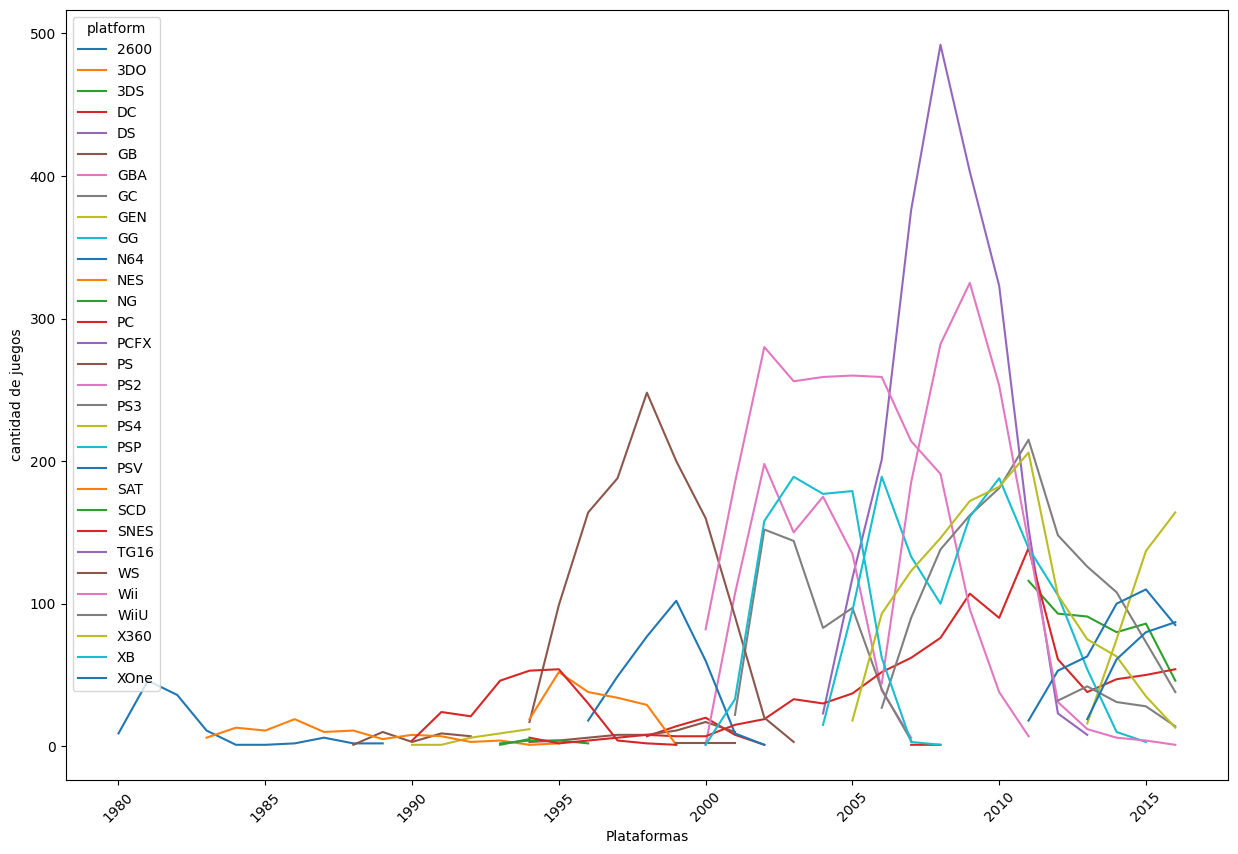

In [33]:

tabla_JUEGOS_por_año = df.groupby(["year_of_release", "platform"])[
    "name"].count().reset_index().query("year_of_release > 0")

tiempo_de_vida = pd.pivot_table(
    tabla_JUEGOS_por_año, index="year_of_release", columns="platform", values="name", aggfunc="sum")

tiempo_de_vida.plot.line(figsize=[15,10],
                         xlabel="Plataformas",
                         ylabel="cantidad de juegos",
                         rot=45,)

print("vamos a evidenciar la linea de vida de cada plataforma al pasar de los años")
print()
print("Como podemos observar evidenciamos que apartir del año 2000 vemos un auge en la creacion de juegos ")

basados en los datos de los analisis anteriores podemos determinar que los datos de alto valor para realizar analisis seran desde el año 2000 ya que vemos una alta produccion de juegos.

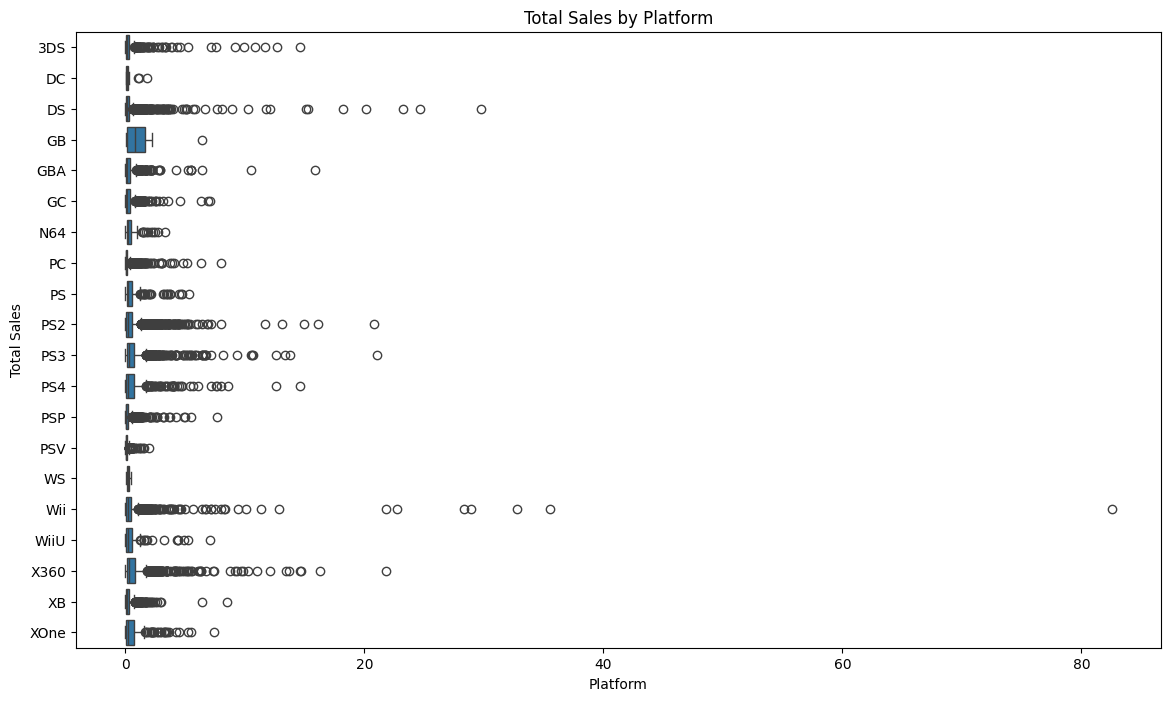

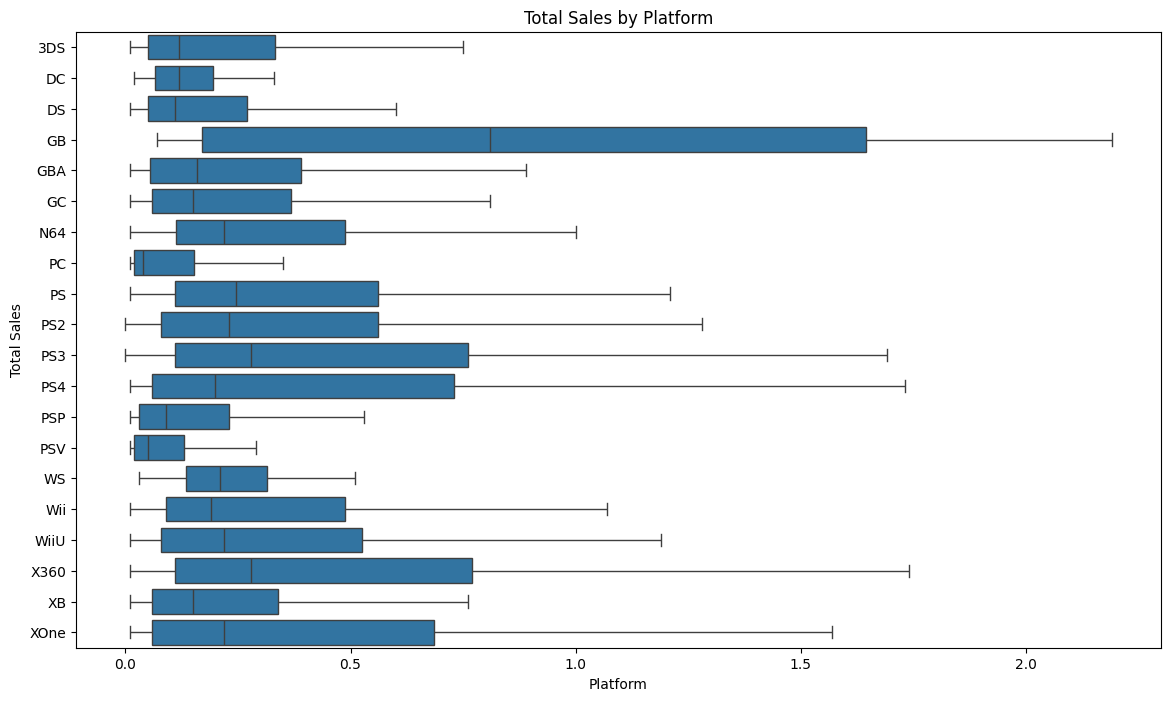

In [34]:
#filtred relevant data from year 2000 to more recent
Datos_relevantes = df.query("year_of_release >= 2000")
Datos_relevantes_graph = Datos_relevantes.pivot_table(index="platform",columns= "name", values="total_sales",aggfunc="sum").reset_index()
Datos_relevantes_graph_melted = Datos_relevantes_graph.melt(
    id_vars="platform", var_name="name", value_name="total_sales")

# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_sales', y='platform', data=Datos_relevantes_graph_melted)
# Add title and labels
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

print()

#create a new boxplot avoiding the outliers
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_sales', y='platform', data=Datos_relevantes_graph_melted, showfliers=False)
# Add title and labels
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()




como podemos observar hay varias diferencias entre los valores atipicos, adicional a esto se puede evidenciar en la segunda grafica de caja que el promedio de ventas por plataforma no es muy diferente entre cada una de ellas pero sin embargo las diferencias en las ventas maximas si varian, en conclucion se puede decir que el promedio de las ventas atravez del tiempo tiende a ser el similar entre cada una teniendo pequeñas variaciones entre las plataformas.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

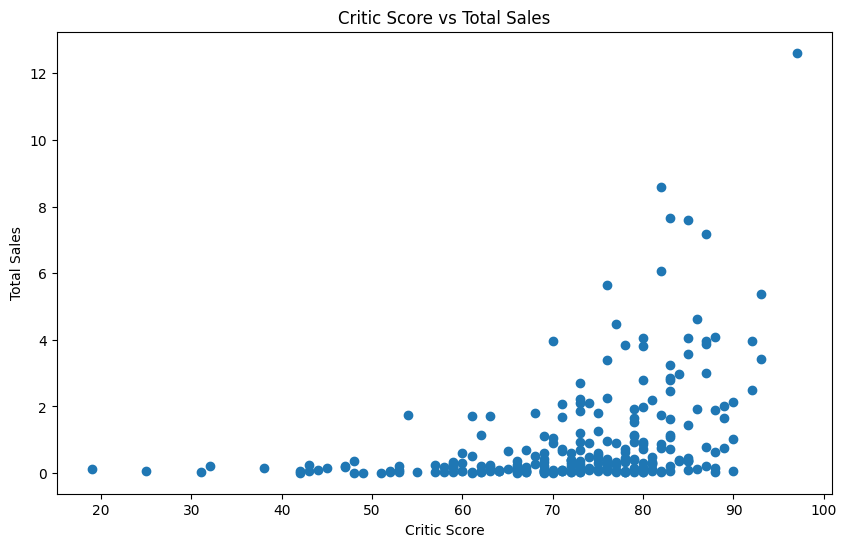

In [35]:
#Vamos a seleccionar las columnas que se usaran en este apartado
columns = ['platform', "name", 'critic_score', 'total_sales']

#se filtrara la infomracion seleccionando la plataforma especifica y teniendo
#en cuenta las columnas seleccionadas
Plataforma_ps4=df[columns].query("platform == 'PS4'")

#ahora se creara una grafica de dispercion para interpretar los datos
plt.figure(figsize=(10, 6))
plt.scatter(Plataforma_ps4['critic_score'], Plataforma_ps4['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Critic Score vs Total Sales')
plt.show()

Como se puede observar las ventas de los juegos en la plataforma PS4, las ventas suelen aumentar siempre que las reseñas son mejores como se evidencia, los juegos con criticas del 70% en adelante tienden a generar mas ventas. en conclusion la influencia de las criticas positivas mayor al 70% aumenta las ventas del mismo esto nos lleva a que tiene una correlacion positiva.

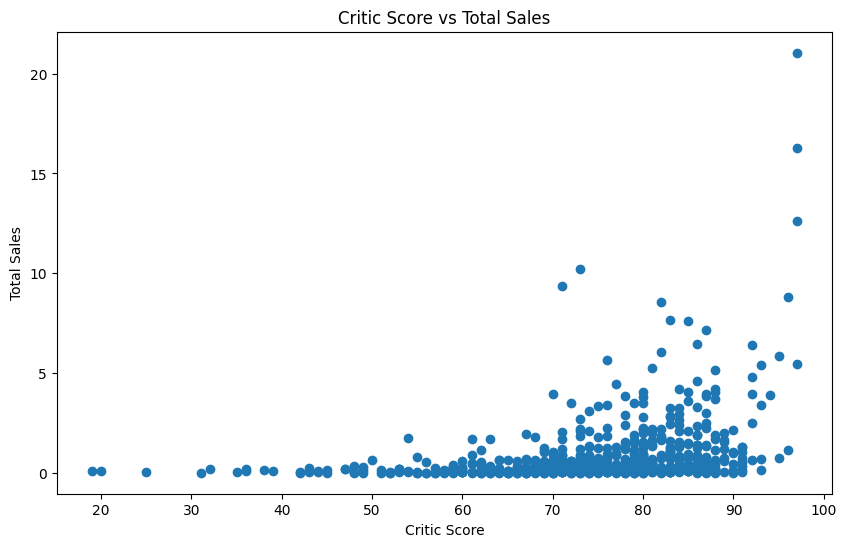

In [36]:
#Se realiza la creacion de un dataframe de los juegos del PS4
Plataforma_ps4_games=Plataforma_ps4["name"]
#filtrado de los juegos del PS4 en todas las demas plataformas
ps4_vs_games_plataformas = df[df['name'].isin(Plataforma_ps4_games)]
#Creacion de un grafico de dispersion de la venta de los juegos de PS4 en las
#demas plataformas
plt.figure(figsize=(10, 6))
plt.scatter(ps4_vs_games_plataformas['critic_score'],
            ps4_vs_games_plataformas['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Critic Score vs Total Sales')
plt.show()

Como podemos observar, se evidencia que los juegos vendidos en la plataforma PS4 con un critic_score de mas de 70% se vendieron en la misma tendencia en las demas plataformas teniendo una correlacion positiva.

# ¿Qué se puede decir de los géneros más rentables?


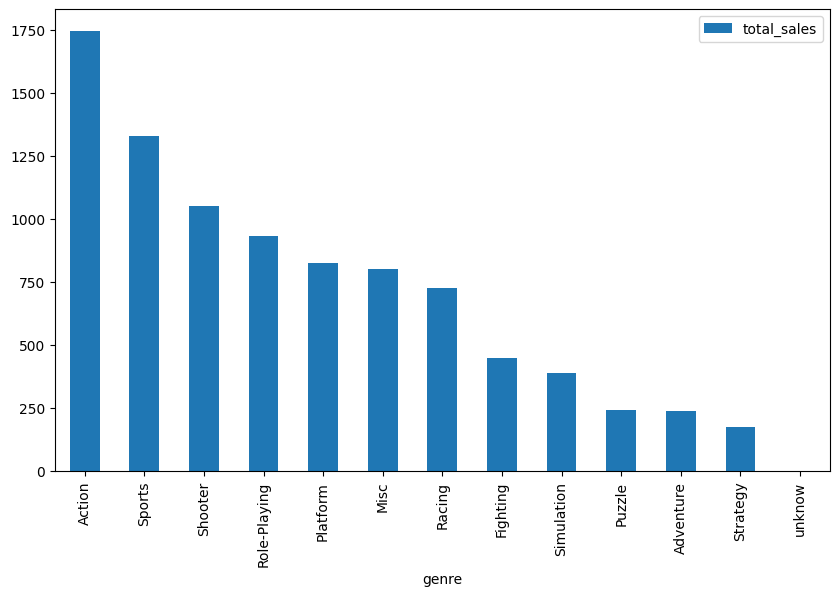

In [44]:
df_pivot_games=df.pivot_table(index="genre",values="total_sales",aggfunc="sum",).sort_values(by="total_sales",ascending=False)
df_pivot_games.plot(kind="bar",
                    figsize=(10,6))
plt.show()

Se puede apreciar que se cuenta con un total de 3 generos Action. Sports, Shooter  los cuales son los mas rentables ya que cuentan con mas de un 1000 ventas.

# ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


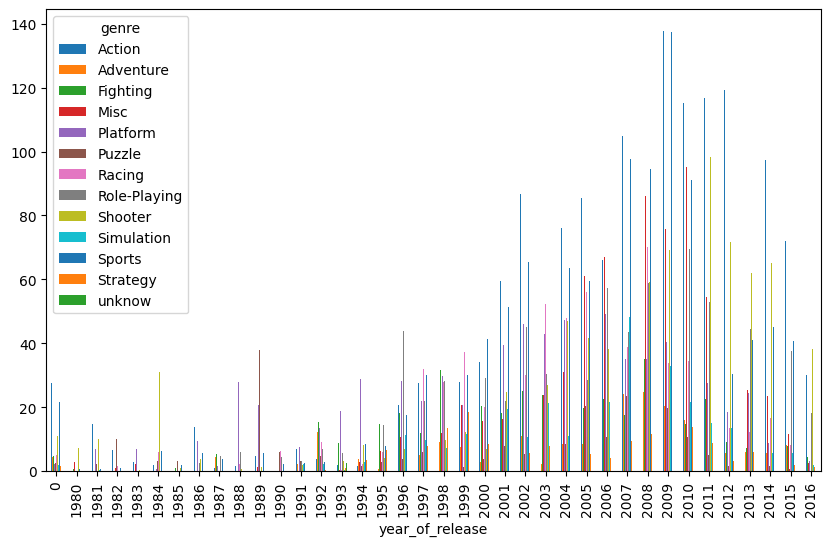

In [54]:
df_pivot_games_years=df.pivot_table(index="year_of_release",
                                    columns="genre",
                                    values="total_sales",
                                    aggfunc="sum",)
df_pivot_games_years.plot(kind="bar",
                    figsize=(10,6))
plt.show()

podemos generalizar en que las ventas de los juegos por genero han tenido un comportamiento muy similar al pasar de los años en los que los mismos generos han tenido su crecimiento al pasar de los años.

# Crea un perfil de usuario para cada región, con Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [77]:
na_sales=df.groupby(by=["platform"])['na_sales'].sum()
na_sales=na_sales

eu_sales=df.groupby(by=["platform"])['na_sales'].sum()
na_sales=na_sales.loc[["DS","Wii","PS3","X360","PS2"]]
jp_sales=df.groupby(by=["platform"])['na_sales'].sum()


In [76]:
df_eu = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'eu_sales'], axis=1)
#display(df_ue)
df_euagrupado=df_eu.groupby(by=["platform"])['eu_sales'].sum()
df_euagrupado=pd.DataFrame(df_euagrupado)
df_euagrupado=df_euagrupado.sort_values(by=['eu_sales'], ascending = False)

KeyError: ('name', 'platform', 'year_of_release', 'genre', 'eu_sales')